In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [6]:
# Read the dataset CSV file
dataset = pd.read_csv('/home/adam/FurtherResearch/Dataset/Exoskeleton/Original.csv')

# Separate the features and the target
X = dataset.iloc[:, :-2]  # everything except the last column (fatigue_level)
y = dataset.iloc[:, -2]  # fatigue_level
y

0       1
1       1
2       1
3       1
4       1
       ..
1828    3
1829    3
1830    3
1831    3
1832    3
Name: Fatigue_level, Length: 1833, dtype: int64

# 1. Apply LDA to the dataset and get the top 10 features with target

In [7]:
# apply LDA
lda = LDA(n_components=None)  # n_components=None 
X_lda = lda.fit(X, y)

# get the feature importance (sum of absolute values of the coefficients)
feature_importances = np.abs(X_lda.coef_).sum(axis=0)

# get the indices of the top 10 features
top_features_indices = np.argsort(feature_importances)[::-1][:10]
top_features = dataset.columns[top_features_indices]
top_features

Index(['OFS_FIB_MNF', 'OFS_FIB_MDF', 'EMG_EMG_MDF', 'IMU2_AccX_Mean',
       'EMG_EMG_IMNF', 'EMG_EMG_MNF', 'OFS_FIB_IMNF', 'IMU2_AccZ_Mean',
       'IMU2_AccZ_RMS', 'IMU2_AccZ_StdDev'],
      dtype='object')

In [8]:
# use only the top 10 features apply K-means clustering
X_top_features = X[top_features]
X_top_features

,OFS_FIB_MNF,OFS_FIB_MDF,EMG_EMG_MDF,IMU2_AccX_Mean,EMG_EMG_IMNF,EMG_EMG_MNF,OFS_FIB_IMNF,IMU2_AccZ_Mean,IMU2_AccZ_RMS,IMU2_AccZ_StdDev
0,0.002432,0.204083,0.230724,100.000000,22.334139,0.293036,1.282506,100.000000,100.000000,100.000000
1,0.313588,0.214659,0.181664,89.830555,8.384712,0.142451,1.147393,87.215910,95.060985,97.623449
2,0.576482,0.247898,0.234438,81.878233,8.372799,0.385845,0.989183,80.322407,93.423653,97.518917
3,0.170905,0.195446,0.192446,88.058375,7.684195,0.426387,0.912529,94.426002,104.269905,107.432588
4,0.172522,0.198108,0.220765,90.980290,7.496121,0.501780,0.880923,98.265519,114.053725,119.005683
...,...,...,...,...,...,...,...,...,...,...
1828,0.000087,0.156739,0.208658,2.747222,8.023430,0.407665,0.808654,1.957816,11.241130,11.091271
1829,0.000129,0.213413,0.210199,2.757767,9.214335,0.395226,0.807963,2.058811,11.797109,11.638002
1830,0.000100,0.156943,0.214340,2.699114,7.786317,0.400278,0.806151,2.158858,12.102531,11.928677
1831,0.000063,0.124892,0.217625,2.772969,8.059900,0.440773,1.029054,2.098931,12.336496,12.178948


In [9]:
# add target colum in the X_top_features
X_top_features['fatigue_level'] = y
X_top_features

/tmp/ipykernel_9785/4026693783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_top_features['fatigue_level'] = y


,OFS_FIB_MNF,OFS_FIB_MDF,EMG_EMG_MDF,IMU2_AccX_Mean,EMG_EMG_IMNF,EMG_EMG_MNF,OFS_FIB_IMNF,IMU2_AccZ_Mean,IMU2_AccZ_RMS,IMU2_AccZ_StdDev,fatigue_level
0,0.002432,0.204083,0.230724,100.000000,22.334139,0.293036,1.282506,100.000000,100.000000,100.000000,1
1,0.313588,0.214659,0.181664,89.830555,8.384712,0.142451,1.147393,87.215910,95.060985,97.623449,1
2,0.576482,0.247898,0.234438,81.878233,8.372799,0.385845,0.989183,80.322407,93.423653,97.518917,1
3,0.170905,0.195446,0.192446,88.058375,7.684195,0.426387,0.912529,94.426002,104.269905,107.432588,1
4,0.172522,0.198108,0.220765,90.980290,7.496121,0.501780,0.880923,98.265519,114.053725,119.005683,1
...,...,...,...,...,...,...,...,...,...,...,...
1828,0.000087,0.156739,0.208658,2.747222,8.023430,0.407665,0.808654,1.957816,11.241130,11.091271,3
1829,0.000129,0.213413,0.210199,2.757767,9.214335,0.395226,0.807963,2.058811,11.797109,11.638002,3
1830,0.000100,0.156943,0.214340,2.699114,7.786317,0.400278,0.806151,2.158858,12.102531,11.928677,3
1831,0.000063,0.124892,0.217625,2.772969,8.059900,0.440773,1.029054,2.098931,12.336496,12.178948,3


In [17]:
# Re-classifying the dataset based on the new fatigue level definitions
# Mapping 0 to low fatigue, 1 to medium fatigue, and 2 to high fatigue
mapped_fatigue_levels = {1: "low", 2: "medium", 3: "high"}
dataset['Mapped_Fatigue_Level'] = X_top_features['fatigue_level'].map(mapped_fatigue_levels)

# Paths for the new output files
new_output_paths = []

for level, level_name in mapped_fatigue_levels.items():
    level_stats = X_top_features[X_top_features['fatigue_level'] == level].describe().transpose()[['min', 'max', 'mean', 'std']]
    new_output_file_path = f'dataset_statistics_mapped_fatigue_level_{level_name}.csv'
    level_stats.to_csv(new_output_file_path)
    new_output_paths.append(new_output_file_path)

new_output_paths


['dataset_statistics_mapped_fatigue_level_low.csv',
 'dataset_statistics_mapped_fatigue_level_medium.csv',
 'dataset_statistics_mapped_fatigue_level_high.csv']

# 2. Apply K-means clustering to the dataset and get the cluster centers

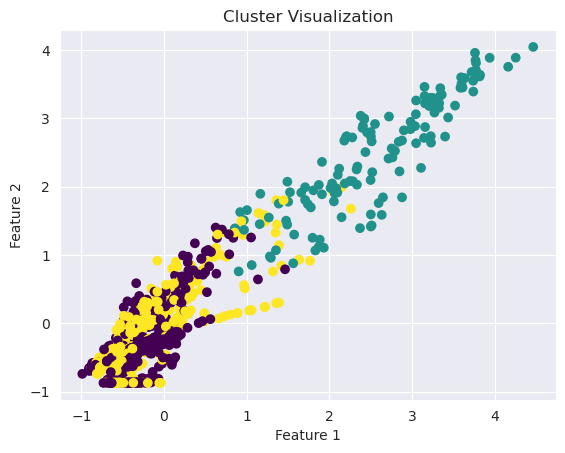

In [47]:
# standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_top_features)

# apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  
kmeans.fit(X_scaled)
labels = kmeans.labels_

# plot the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('Cluster Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [48]:
# create a dataframe to store the range of each feature in each cluster
clusters_range = pd.DataFrame(columns=X_top_features.columns)

# calculate the range of each feature in each cluster
for cluster in set(labels):
    cluster_data = dataset[labels == cluster]
    min_values = cluster_data.min()
    max_values = cluster_data.max()
    cluster_range = max_values - min_values
    clusters_range = pd.concat([clusters_range, pd.DataFrame([cluster_range], columns=X_top_features.columns)], ignore_index=True)

# print the range of each feature in each cluster
clusters_range

,OFS_FIB_MDF,OFS_FIB_MNF,EMG_EMG_MDF,IMU2_AccX_Mean,OFS_FIB_IMNF,IMU2_AccX_RMS,IMU2_AccX_StdDev,EMG_EMG_IMNF,IMU2_AccZ_RMS,IMU2_GyroY_RMS
0,0.387595,0.782920,1.093508,69.680569,3.161278,63.196000,68.997415,46.903832,91.889922,1238.265141
1,0.570296,1.131462,0.398213,113.623967,6.764543,90.680309,221.600076,47.325434,156.903532,4726.450272
2,0.534401,1.240330,1.460076,104.516760,3.715123,245.011741,270.544665,46.299817,1256.839082,13295.999430


In [49]:
# get the cluster centers
cluster_centers = kmeans.cluster_centers_

# inverse standardize the cluster centers
cluster_centers_original = scaler.inverse_transform(cluster_centers)
cluster_centers_df = pd.DataFrame(cluster_centers_original, columns=X_top_features.columns)

# print the cluster centers
cluster_centers_df

,OFS_FIB_MDF,OFS_FIB_MNF,EMG_EMG_MDF,IMU2_AccX_Mean,OFS_FIB_IMNF,IMU2_AccX_RMS,IMU2_AccX_StdDev,EMG_EMG_IMNF,IMU2_AccZ_RMS,IMU2_GyroY_RMS
0,0.175445,0.180247,0.191514,12.030465,1.036628,18.751795,13.013892,8.410020,16.549236,195.913072
1,0.632928,1.141878,0.243356,15.719163,1.513800,18.107389,11.318825,9.350145,20.234027,234.112054
2,0.198987,0.232093,0.197515,101.048437,1.084473,121.126184,131.501700,8.397000,147.157483,1873.487463


In [ ]:
from sklearn import metrics

# 假设 labels_true 是真实的标签，labels_pred 是聚类算法的输出
labels_true =   # 真实的标签
labels_pred = [...]  # 聚类算法得到的标签

# 计算各种度量指标
accuracy = metrics.accuracy_score(labels_true, labels_pred)  # 通常不推荐
adjusted_rand_index = metrics.adjusted_rand_score(labels_true, labels_pred)
mutual_info = metrics.adjusted_mutual_info_score(labels_true, labels_pred)
homogeneity, completeness, v_measure = metrics.homogeneity_completeness_v_measure(labels_true, labels_pred)

# 输出结果
print("Accuracy:", accuracy)
print("Adjusted Rand Index:", adjusted_rand_index)
print("Adjusted Mutual Information:", mutual_info)
print("Homogeneity:", homogeneity)
print("Completeness:", completeness)
print("V-measure:", v_measure)
